<a href="https://colab.research.google.com/github/seymatttass/Plant_Detection/blob/main/resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/AYZEK-Kanarya/yeni_arttırılmış/train'
test_path = '/content/drive/MyDrive/AYZEK-Kanarya/dataset_2_class/test'
val_path = '/content/drive/MyDrive/AYZEK-Kanarya/yeni_arttırılmış/val'

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1/255) # Ölçeklendirme
test_data_gen = ImageDataGenerator(rescale=1/255)
val_data_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
        train_path,
        target_size=(224, 224), # Görüntü boyutları
        batch_size=32,
        class_mode='categorical')  # Sınıf modu, çok sınıflı bir sınıflandırma olduğu için 'categorical'

Found 2292 images belonging to 4 classes.


In [ ]:

test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),  # Görüntü boyutları
    batch_size=32,
    class_mode='categorical'  # Sınıf modu, çok sınıflı bir sınıflandırma olduğu için 'categorical'
)

Found 341 images belonging to 2 classes.


In [ ]:
val_generator = val_data_gen.flow_from_directory(
    val_path,
    target_size=(224, 224),  # Görüntü boyutları
    batch_size=32,
    class_mode='categorical'  # Sınıf modu, çok sınıflı bir sınıflandırma olduğu için 'categorical'
)

Found 300 images belonging to 4 classes.


In [ ]:
checkpoint = ModelCheckpoint(
    f'/content/drive/MyDrive/AYZEK-Kanarya/models/resnet-50/resnet-50_model1meren.h5',
     monitor='val_accuracy',
     verbose=1,
     save_best_only=True,
     mode = 'max'
)

In [ ]:
model = Sequential()
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(resnet)

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Modeli eğitme
results = model.fit(train_generator, epochs=20, verbose=1, callbacks=[checkpoint], validation_data= val_generator)


Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 2.0230 - accuracy: 0.4402
Epoch 1: val_accuracy improved from -inf to 0.25333, saving model to /content/drive/MyDrive/AYZEK-Kanarya/models/resnet-50/resnet-50_model1meren.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 691s 9s/step - loss: 2.0230 - accuracy: 0.4402 - val_loss: 1.5415 - val_accuracy: 0.2533
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.6466
Epoch 2: val_accuracy improved from 0.25333 to 0.28000, saving model to /content/drive/MyDrive/AYZEK-Kanarya/models/resnet-50/resnet-50_model1meren.h5
72/72 [==============================] - 70s 974ms/step - loss: 1.0912 - accuracy: 0.6466 - val_loss: 1.7852 - val_accuracy: 0.2800
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.7893 - accuracy: 0.7308
Epoch 3: val_accuracy improved from 0.28000 to 0.31667, saving model to /content/drive/MyDrive/AYZEK-Kanarya/models/resnet-50/resnet-50_model1meren.h5
72/72 [==============================] - 65s 899ms/step - loss: 0.7893 - accuracy: 0.7308 - val_loss: 1.6567 - val_accuracy: 0.3167
Epoch 4/20
72/72 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.7727
Epoch 4: val_accuracy 

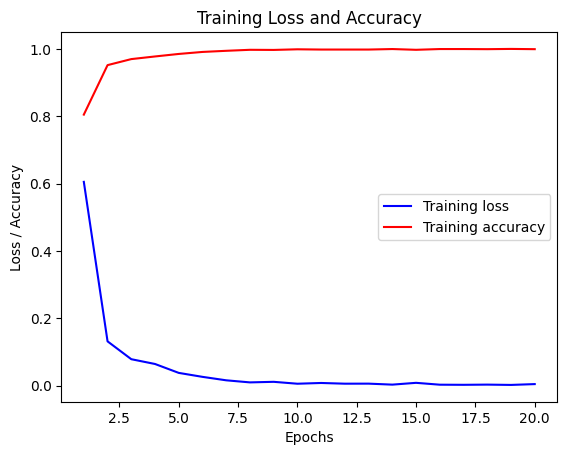

In [ ]:
import matplotlib.pyplot as plt
train_loss = results.history['loss']
train_accuracy = results.history['accuracy']

# train loss ve train accuracy görselleştirilmesi
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

11/11 [==============================] - 6s 461ms/step


ValueError: Asked to retrieve element 11, but the Sequence has length 11

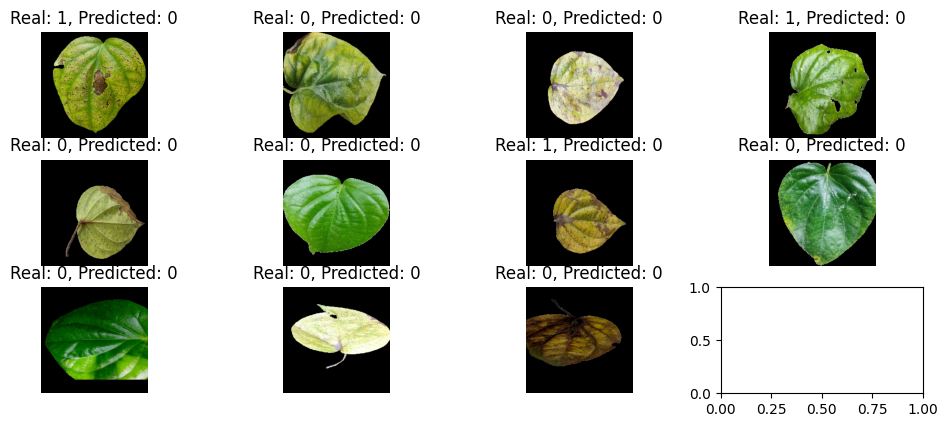

In [ ]:
#model ile tahmin (test verileriyle)
predictions = model.predict(test_generator)

# test verileri ve tahmin edilen değerler arasındaki karşılaştırma
num_samples_to_visualize = 20
test_labels = []  # Gerçek değerleri tutan boş liste
predicted_labels = []  # Tahmin edilen değerleri tutan boş liste

# Test verilerinden örnekleri al
for i, (_, labels) in enumerate(test_generator):
    test_labels.extend(labels.argmax(axis=1))  # Gerçek etiketleri al
    predicted_labels.extend(predictions.argmax(axis=1))  # Tahmin edilen etiketleri al
    if i == num_samples_to_visualize - 1:
        break

# Sonuçları görselleştir
plt.figure(figsize=(12, 8))
for i in range(num_samples_to_visualize):
    plt.subplot(5, 4, i + 1)
    plt.imshow(test_generator[i][0][0])  # Test resmini göster
    plt.title(f'Real: {test_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
